In [1]:
using LinearAlgebra
using CSV
using Plots

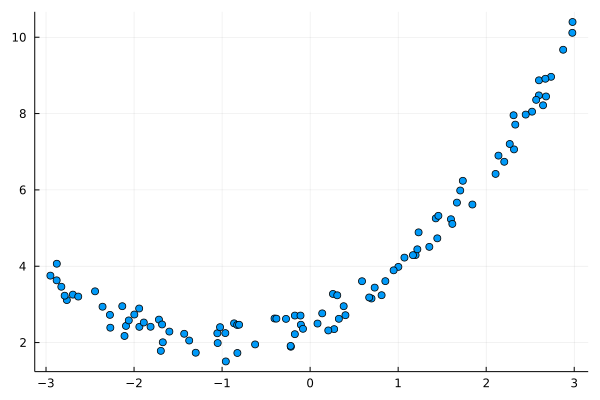

In [2]:
# Generate 20 data points using noisy quadratic curve
N = 100
X = 6*rand(N) .- 3
Y = 0.5* X.^2 .+  X .+ 2 .+ rand(N)
fig1 = scatter(X, Y, legend = false)

In [3]:
deg = 2

function ϕv(x)
    return [1, x, x^2]
end

function f_hat(x, w)
    return ϕv(x)'*w
end

function Φmat(X)
    Φ = ϕv(X[1])'
    for i=2:length(X)
        Φ = [Φ; 
             ϕv(X[i])']
    end
    return Φ
end

Φmat(X)

100×3 Matrix{Float64}:
 1.0   2.59839    6.75164
 1.0   1.19799    1.43517
 1.0  -0.173518   0.0301084
 1.0   0.381162   0.145284
 1.0  -1.93978    3.76273
 1.0   2.67969    7.18076
 1.0  -2.35794    5.55988
 1.0   2.52064    6.35365
 1.0   1.59961    2.55874
 1.0  -0.104953   0.011015
 1.0   2.98073    8.88478
 1.0   0.32651    0.106609
 1.0   1.42733    2.03728
 ⋮                
 1.0  -1.68175    2.82828
 1.0   0.206296   0.0425581
 1.0   2.33049    5.43119
 1.0   2.26756    5.14183
 1.0   0.0839742  0.00705167
 1.0   1.07135    1.1478
 1.0   1.16815    1.36457
 1.0   2.67237    7.14156
 1.0   1.73455    3.00866
 1.0  -0.624749   0.390312
 1.0  -1.5989     2.55647
 1.0   0.948506   0.899663

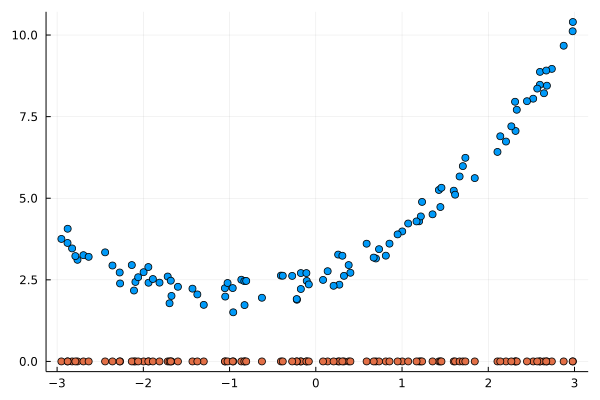

In [4]:
# Initial guess of parameters
w = zeros(deg+1)
scatter!(fig1, X, f_hat.(X, Ref(w)), legend = false)

In [7]:
# Analytical solution
Φm = Φmat(X)
w = (Φm'*Φm)\(Φm'*Y)
scatter!(fig1, X, f_hat.(X, Ref(w)), legend = false)
print(w)

[2.5323760966089024, 0.9938236752788618, 0.4866991174475612]

[2.527643696234621, 1.0043387890793092, 0.49149096203365017]

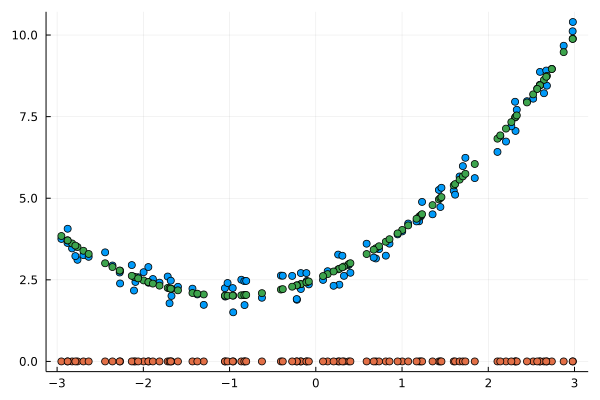

In [6]:
# Gradient descent
max_steps = 5000
lr = 1e-3
Φm = Φmat(X)
w = rand(deg+1)

for i=1:max_steps
    ∇E = (-Φm'*Y + Φm'*(Φm*w))
    w = w - lr*∇E
end
print(w)
scatter!(fig1,X, f_hat.(X, Ref(w)), legend = false)

[2.5267380741933043, 1.0024628194618221, 0.49713817103058683]

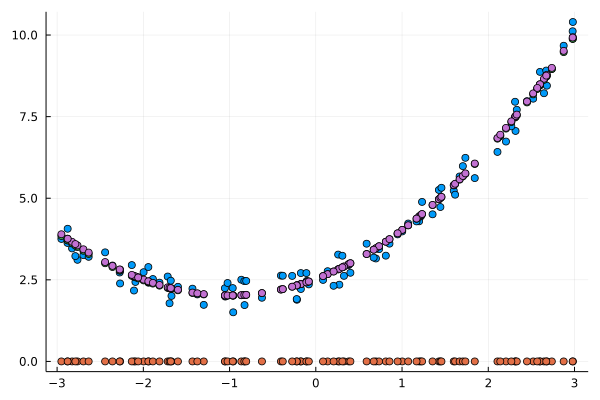

In [8]:
# Stochastic gradient descent
max_steps = 5000
lr = 1e-3
Φm = Φmat(X)
w = rand(deg+1)

for i=1:max_steps
    for j=1:N
        ∇E = (-Φm[j,:]*Y[j] + Φm[j,:]*(Φm[j,:]'*w))
        w = w - lr*∇E
    end
end
print(w)
scatter!(fig1, X, f_hat.(X, Ref(w)), legend = false)

[2.3811663640033216, 1.001496039508873, 0.5249798474629307]

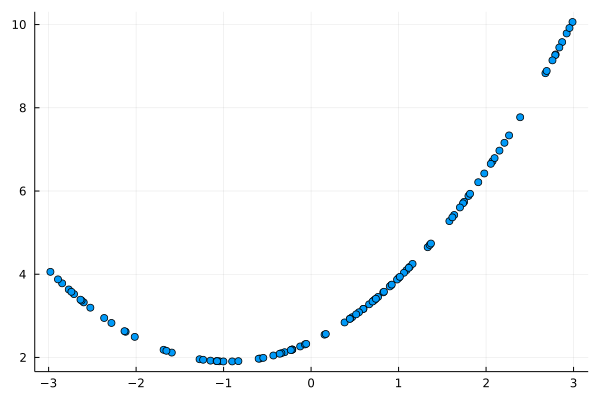

In [190]:
# Batch gradient descent
max_steps = 5000
lr = 1e-3
Φm = Φmat(X)
w = rand(deg+1)
blL = 1:5

for i=1:max_steps
    for j=1:Int(N/length(blL))
        ∇E = (-Φm[j*blL,:]'*Y[j*blL] + Φm[j*blL,:]'*(Φm[j*blL,:]*w))
        w = w - lr*∇E
    end
end
print(w)
fig3 = scatter(X, f_hat.(X, Ref(w)), legend = false)